In [5]:
import numpy as np
import pandas as pd
import time
import os
import matplotlib.pyplot as plt
import keras

Using TensorFlow backend.


In [6]:
df=pd.read_csv('./dataset/XSS_dataset.csv',encoding='utf-8-sig')
df.head()

,Unnamed: 0,Sentence,Label
0,0,"<li><a href=""/wiki/File:Socrates.png"" class=""i...",0
1,1,"<tt onmouseover=""alert(1)"">test</tt>",1
2,2,"\t </span> <span class=""reference-text"">Steeri...",0
3,3,"\t </span> <span class=""reference-text""><cite ...",0
4,4,"\t </span>. <a href=""/wiki/Digital_object_iden...",0


In [7]:
df=df[df.columns[-2:]]
df.head()

,Sentence,Label
0,"<li><a href=""/wiki/File:Socrates.png"" class=""i...",0
1,"<tt onmouseover=""alert(1)"">test</tt>",1
2,"\t </span> <span class=""reference-text"">Steeri...",0
3,"\t </span> <span class=""reference-text""><cite ...",0
4,"\t </span>. <a href=""/wiki/Digital_object_iden...",0


In [8]:
sentences=df['Sentence'].values
sentences[0]

'<li><a href="/wiki/File:Socrates.png" class="image"><img alt="Socrates.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Socrates.png/18px-Socrates.png" decoding="async" width="18" height="28" class="noviewer" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Socrates.png/27px-Socrates.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Socrates.png/36px-Socrates.png 2x" data-file-width="326" data-file-height="500" /> </a> <a href="/wiki/Portal:Philosophy" title="Portal:Philosophy">Philosophy&#32;portal </a> </li> </ul>'

In [9]:
df.shape[0]

13686

In [10]:
print("正常的payload：%s" % df[df['Label']==0].shape[0])
print("恶意的payload：%s" % df[df['Label']==1].shape[0])

正常的payload：6313
恶意的payload：7373


In [11]:
def MakeFeature(sentences):
    charList = ["onmouseover=","onload=", "onerror=", "javascript","alert", "src=", "confirm", "onblur"]
    markList = ["=", ":",">", "<", '"', "'", ")","(", "."]
    featureList = []
    for i in range(len(sentences)):
        char_count, mark_count = 0, 0
        payload =sentences[i]
        for charts in charList:
            char_count = payload.count(charts)+ char_count
        for marks in markList:
            mark_count = payload.count(marks) +mark_count
        featureList.append([char_count,mark_count])
    return featureList

In [12]:
featureList=MakeFeature(sentences)
featureList

[[1, 73],
 [2, 9],
 [0, 25],
 [0, 48],
 [0, 62],
 [0, 21],
 [0, 14],
 [0, 48],
 [0, 13],
 [0, 2],
 [0, 12],
 [2, 11],
 [1, 12],
 [1, 7],
 [0, 2],
 [0, 14],
 [1, 12],
 [1, 9],
 [2, 9],
 [0, 14],
 [1, 7],
 [0, 47],
 [0, 2],
 [1, 9],
 [3, 7],
 [1, 9],
 [0, 14],
 [1, 14],
 [0, 14],
 [0, 116],
 [1, 9],
 [0, 41],
 [1, 19],
 [1, 12],
 [0, 2],
 [0, 14],
 [2, 11],
 [1, 17],
 [1, 12],
 [0, 14],
 [0, 88],
 [1, 12],
 [0, 96],
 [0, 12],
 [0, 19],
 [0, 5],
 [0, 21],
 [1, 14],
 [0, 2],
 [0, 14],
 [1, 9],
 [0, 5],
 [2, 9],
 [1, 17],
 [0, 10],
 [0, 6],
 [2, 7],
 [1, 12],
 [0, 4],
 [0, 21],
 [0, 10],
 [1, 17],
 [1, 7],
 [1, 9],
 [1, 3],
 [1, 17],
 [1, 7],
 [1, 11],
 [0, 7],
 [0, 12],
 [0, 2],
 [1, 17],
 [0, 14],
 [0, 37],
 [0, 17],
 [1, 7],
 [1, 9],
 [0, 10],
 [1, 9],
 [1, 9],
 [1, 9],
 [0, 7],
 [2, 9],
 [0, 7],
 [0, 29],
 [0, 2],
 [0, 14],
 [2, 9],
 [1, 22],
 [0, 3],
 [1, 9],
 [0, 2],
 [1, 9],
 [1, 7],
 [1, 12],
 [0, 14],
 [1, 9],
 [1, 19],
 [1, 9],
 [1, 9],
 [0, 5],
 [1, 11],
 [0, 14],
 [0, 7],
 [1, 1

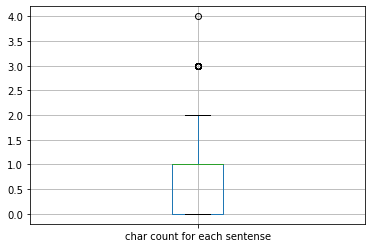

In [13]:
char_count_sentense=[]
mark_count_sentense=[]
for i in range(len(featureList)):
    char_count_sentense.append(featureList[i][0])
    mark_count_sentense.append(featureList[i][1])
char_count_sen=pd.DataFrame(char_count_sentense,columns=['char count for each sentense'])
char_count_sen.boxplot(column=['char count for each sentense'])
mark_count_sen=pd.DataFrame(mark_count_sentense,columns=['mark count for each sentense'])

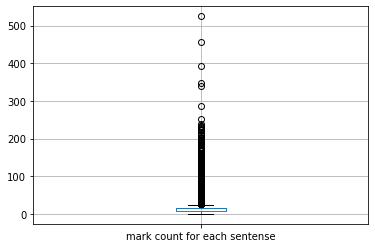

In [14]:
mark_count_sen.boxplot(column=['mark count for each sentense'])

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def train(x,y):
    x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.4, random_state=666)
    param = {'n_estimators': 200, 'max_depth':200, 'min_samples_split': 2, 'learning_rate': 0.01}
    NBM = [
            MultinomialNB(alpha=0.01),  # 多项式模型-朴素贝叶斯
            DecisionTreeClassifier(max_depth=100),
            RandomForestClassifier(criterion='gini', max_depth=100,n_estimators=200),
            LogisticRegression(random_state=40,solver='lbfgs', max_iter=10000, penalty='l2',multi_class='multinomial',class_weight='balanced', C=100),  
            svm.SVC(C=0.1,kernel='linear')
           ]
    NAME = ["朴素贝叶斯", "决策树", "随机森林", "逻辑回归",'SVM']
    for model, modelName in zip(NBM, NAME):
        model.fit(x_train, y_train)
        pred = model.predict(x_test)
        dts = len(np.where(pred == y_test)[0])/ len(y_test)
        print("-----------------------{}---------------------".format(modelName, dts * 100))
        print('Accuracy score: ', '{:.3f}'.format(accuracy_score(y_test, pred)*100))
        print('Precision score: ', '{:.3f}'.format(precision_score(y_test, pred)*100))
        print('Recall score: ', '{:.3f}'.format(recall_score(y_test, pred)*100))
        print('F1 score: ', '{:.3f}'.format(f1_score(y_test, pred)*100))
        joblib.dump(model, './model.pkl')

In [16]:
x=featureList
y=df['Label']
train(x,y)    

-----------------------朴素贝叶斯---------------------
Accuracy score:  97.936
Precision score:  97.288
Recall score:  98.911
F1 score:  98.093
-----------------------决策树---------------------
Accuracy score:  99.142
Precision score:  99.656
Recall score:  98.741
F1 score:  99.196
-----------------------随机森林---------------------
Accuracy score:  99.142
Precision score:  99.656
Recall score:  98.741
F1 score:  99.196
-----------------------逻辑回归---------------------
Accuracy score:  99.105
Precision score:  99.656
Recall score:  98.673
F1 score:  99.162
-----------------------SVM---------------------
Accuracy score:  98.758
Precision score:  99.010
Recall score:  98.673
F1 score:  98.841


In [17]:
def predicts(x):
    clf = joblib.load('./model.pkl')
    return clf.predict(x)

    
    #forres, req in zip(predicts(x), testX):
    #print("XSS==>" if res == 1 else "None==>", req)

In [18]:
testX =["<script>alert(1)</script>", "<script>alert('xss');</script> ","123123sadas","onloads2s", "scriptsad23asdasczxc","onload=alert(1)"]
x =MakeFeature(testX)
for res ,req in zip(predicts(x), testX):
    print("XSS==>" if res == 1else "None==>", req)

XSS==> <script>alert(1)</script>
XSS==> <script>alert('xss');</script> 
None==> 123123sadas
None==> onloads2s
None==> scriptsad23asdasczxc
XSS==> onload=alert(1)


- 调参

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def train2(x,y):
    x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.4, random_state=666)
    param = {'n_estimators': 200, 'max_depth':200, 'min_samples_split': 2, 'learning_rate': 0.01}
    NBM = [
            MultinomialNB(alpha=0.01),  # 多项式模型-朴素贝叶斯
            DecisionTreeClassifier(max_depth=100),
            RandomForestClassifier(criterion='gini', max_depth=200,n_estimators=300),
            LogisticRegression(random_state=40,solver='lbfgs', max_iter=10000, penalty='l2',multi_class='multinomial',class_weight='balanced', C=100),  
            svm.SVC(C=0.1,kernel='linear')
           ]
    NAME = ["朴素贝叶斯", "决策树", "随机森林", "逻辑回归",'SVM']
    for model, modelName in zip(NBM, NAME):
        model.fit(x_train, y_train)
        pred = model.predict(x_test)
        dts = len(np.where(pred == y_test)[0])/ len(y_test)
        print("-----------------------{}---------------------".format(modelName, dts * 100))
        print('Accuracy score: ', '{:.3f}'.format(accuracy_score(y_test, pred)*100))
        print('Precision score: ', '{:.3f}'.format(precision_score(y_test, pred)*100))
        print('Recall score: ', '{:.3f}'.format(recall_score(y_test, pred)*100))
        print('F1 score: ', '{:.3f}'.format(f1_score(y_test, pred)*100))
        joblib.dump(model, './model.pkl')